In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# https://medium.com/@anala007/float-display-in-pandas-no-more-scientific-notation-80e3dd28eabe
pd.options.display.float_format = '{:.6f}'.format
pd.set_option("display.max_columns", 40)
# pd.set_option("display.max_rows", 500)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls drive/MyDrive/Airline_Delay_Cause.csv

drive/MyDrive/Airline_Delay_Cause.csv


In [ ]:
 def load_csv_files(file_paths: list[str]):
    """
    Loads csv files

    Args:
        file_paths (list[str]): file paths for csv files

    Returns:
        list[pd.DataFrame or None]: Returns list of dataframes or None if file is not found
    """
    try:
        return [pd.read_csv(file) for file in file_paths]
    except Exception as err:
        # handling exceptions like file not found or invalid format of file
        print(err)
        # returning None value for all files
        return [None for _ in file_paths]

In [ ]:
df=pd.DataFrame([])
df.delay, df.crash = load_csv_files(['drive/MyDrive/Airline_Delay_Cause.csv','drive/MyDrive/cases2024-05-08_14-52.csv'])
#df.delay, df.crash = load_csv_files(['Airline_Delay_Cause.csv',
#                          'cases2024-05-08_14-52.csv'])

<ipython-input-332-b3638019a1b1>:2: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [ ]:
df.delay.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.000000,5.000000,2.460000,1.000000,0.730000,0.000000,0.810000,0.000000,0.000000,672.000000,61.000000,574.000000,20.000000,0.000000,17.000000
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.000000,7.000000,4.250000,0.000000,1.000000,0.000000,1.750000,0.000000,0.000000,348.000000,252.000000,0.000000,33.000000,0.000000,63.000000
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.000000,10.000000,5.940000,0.000000,1.060000,0.000000,3.000000,0.000000,0.000000,859.000000,536.000000,0.000000,47.000000,0.000000,276.000000
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.000000,2.000000,0.560000,0.000000,0.000000,0.000000,1.440000,1.000000,0.000000,75.000000,9.000000,0.000000,0.000000,0.000000,66.000000
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.000000,256.000000,76.880000,8.750000,52.430000,0.000000,117.940000,1.000000,0.000000,21424.000000,8906.000000,732.000000,1487.000000,0.000000,10299.000000


In [ ]:
df.crash.head()

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,ReportNo,N#,SerialNumber,HasSafetyRec,Mode,ReportType,OriginalPublishedDate,DocketOriginalPublishedDate,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,ProbableCause,...,Make,Model,AirCraftCategory,AirportID,AirportName,AmateurBuilt,NumberOfEngines,EngineType,Scheduled,PurposeOfFlight,FAR,AirCraftDamage,WeatherCondition,Operator,BroadPhaseofFlight,ReportStatus,RepGenFlag,MostRecentReportType,DocketUrl,ReportUrl
0,CEN24LA079,ACC,193595,2023-12-31T17:40:00Z,Davenport,Iowa,United States,NaN,N773GB,0702,False,Aviation,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,...,CIRRUS DESIGN CORP,SR22T,AIR,DVN,NaN,false,1,NaN,NaN,PERS,091,Substantial,VMC,JKC LLC,Approach,In work,NaN,Prelim,NaN,https://data.ntsb.gov/carol-repgen/api/Aviatio...
1,ERA24LA084,ACC,193603,2023-12-31T16:13:00Z,Midland,Virginia,United States,NaN,N37GA,004CE,False,Aviation,DirectorBrief,2024-03-21T04:00:00Z,2024-03-21T17:00:00Z,NaN,0.000000,0.000000,0.000000,The pilot’s improper recovery from a bounced l...,...,GOLDEN AVIO S R L,F30 Brio,AIR,HWY,WARRENTON/FAUQUIER,false,1,REC,NaN,PERS,091,Substantial,VMC,NaN,Landing,Completed,NaN,Final,https://data.ntsb.gov/Docket?ProjectID=193603,https://data.ntsb.gov/carol-repgen/api/Aviatio...
2,ERA24FA078,ACC,193581,2023-12-31T14:13:00Z,Mooresville,North Carolina,United States,NaN,N539MA,4692139,False,Aviation,NaN,NaN,NaN,Fatal,1.000000,0.000000,0.000000,NaN,...,PIPER AIRCRAFT INC,PA46R-350T,AIR,14A,LAKE NORMAN AIRPARK,false,1,NaN,NaN,PERS,091,Substantial,VMC,RTM AVIATION LLC,Unknown,In work,NaN,Prelim,NaN,https://data.ntsb.gov/carol-repgen/api/Aviatio...
3,CEN24LA077,ACC,193585,2023-12-30T17:00:00Z,Washington,Missouri,United States,NaN,N678MJ,79-30941,False,Aviation,NaN,NaN,NaN,Serious,0.000000,1.000000,0.000000,NaN,...,BELLANCA,17-30A,AIR,FYG,Washington Regional,false,1,NaN,NSCH,PERS,091,Substantial,VMC,PIASA LLC,Initial Climb,In work,NaN,Prelim,NaN,https://data.ntsb.gov/carol-repgen/api/Aviatio...
4,ERA24LA079,ACC,193587,2023-12-30T16:04:00Z,Daytona Beach,Florida,United States,NaN,"N828AK, FA3XNWMRAN","1689, 163DF81001N020",False,Aviation,DirectorBrief,2024-01-25T05:00:00Z,NaN,NaN,0.000000,0.000000,0.000000,The UAS operator’s failure to operate within t...,...,"ROBINSON HELICOPTER, DJI","R44, MAVIC 2","HELI, UNMANNED",DAB,DAYTONA BEACH INTERNATIONAL,"false, false","1, 4",REC,NaN,"OWRK, OWRK","091, 107","Substantial, Destroyed",VMC,Tunica Helicopters LLC,Approach,Completed,NaN,Final,NaN,https://data.ntsb.gov/carol-repgen/api/Aviatio...


# Data Cleanup

## Airline delay Data cleaning

In [ ]:
df.delay.drop_duplicates(keep=False, inplace=True)

Let's check for null values

Creating a function that prints null value counts and proportion for only columns that are having null values

In [ ]:
def check_null_values(df: pd.DataFrame):
    """
    Checks null values for each columns in dataframe

    Args:
        df (pd.DataFrame): Source dataframe
    """
    null_value_counts = (df.isnull().sum()).sort_values(ascending=False)
    # Removing columns that are not having null values
    null_value_counts = null_value_counts[null_value_counts != 0]
    null_value_percentages = (null_value_counts/df.shape[0]) * 100
    print("Null values for columns:\n", null_value_counts)
    print("\nNull value percentages for columns:\n", null_value_percentages)

In [ ]:
check_null_values(df.delay)

Null values for columns:
 arr_del15              52
nas_ct                 47
security_ct            47
security_delay         47
nas_delay              47
weather_delay          47
carrier_delay          47
arr_delay              47
arr_diverted           47
arr_cancelled          47
late_aircraft_ct       47
late_aircraft_delay    47
weather_ct             47
carrier_ct             47
arr_flights            47
dtype: int64

Null value percentages for columns:
 arr_del15             0.229875
nas_ct                0.207772
security_ct           0.207772
security_delay        0.207772
nas_delay             0.207772
weather_delay         0.207772
carrier_delay         0.207772
arr_delay             0.207772
arr_diverted          0.207772
arr_cancelled         0.207772
late_aircraft_ct      0.207772
late_aircraft_delay   0.207772
weather_ct            0.207772
carrier_ct            0.207772
arr_flights           0.207772
dtype: float64


Since only 0.2% values are null we can drop rows containing null values

In [ ]:
df.delay.dropna(inplace=True)

In [ ]:
df.delay.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22569 entries, 0 to 22620
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 22569 non-null  int64  
 1   month                22569 non-null  int64  
 2   carrier              22569 non-null  object 
 3   carrier_name         22569 non-null  object 
 4   airport              22569 non-null  object 
 5   airport_name         22569 non-null  object 
 6   arr_flights          22569 non-null  float64
 7   arr_del15            22569 non-null  float64
 8   carrier_ct           22569 non-null  float64
 9   weather_ct           22569 non-null  float64
 10  nas_ct               22569 non-null  float64
 11  security_ct          22569 non-null  float64
 12  late_aircraft_ct     22569 non-null  float64
 13  arr_cancelled        22569 non-null  float64
 14  arr_diverted         22569 non-null  float64
 15  arr_delay            22569 non-null  floa

In [ ]:
def change_column_type(df:pd.DataFrame, columns : dict):
  try:
    for ctype, data in columns.items():
      for column in data['columns']:
        try:
            middleware = data.get('middleware', None)
            df[column] = (middleware(df[column]) if middleware is not None else df[column]).astype(ctype)
        except Exception as E:
          print(f"[Error] change_column_type : Error converting column \"{column}\" to {ctype}.\n")
  except Exception as E:
    print(f"[Error] change_column_type : Error converting columns.\n")
  return df

In [ ]:
def round_float_col(df : pd.DataFrame):
  return df.round()

In [ ]:
df.delay = change_column_type(df.delay,{
    "category" : {
        'columns' : ['carrier', 'carrier_name', 'airport', 'airport_name']
    },
    "int" : {
        'columns' : ['arr_flights','carrier_ct', 'weather_ct','nas_ct', 'security_ct', 'late_aircraft_ct', 'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
        'middleware' : round_float_col
    }
    })

In [59]:
df.delay['flight_date'] = pd.to_datetime(df.delay["month"].astype(str) + "-" + df.delay["year"].astype(str))
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df.delay['month'] = pd.Categorical(df.delay['flight_date'].dt.month_name(), categories=months, ordered=True)
df.delay['arr_on_time'] = df.delay['arr_flights'] - df.delay['arr_del15'] - df.delay['arr_cancelled'] - df.delay['arr_diverted']

<ipython-input-59-05a31f3dd858>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.delay['flight_date'] = pd.to_datetime(df.delay["month"].astype(str) + "-" + df.delay["year"].astype(str))


In [269]:
def get_state_name(abb:str):
  abbrev2state = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TT': 'Trust Territory of the Pacific Islands',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming',
        'PR': 'Puerto Rico',
        'VI': 'Virigin Islands'
    }
  state_name = abbrev2state.get(abb.upper(), None)
  if state_name is None:
    print(f"\n[Error] get_state_name: Error converting state abbrev to name for value \"{abb}\"")
  return state_name if state_name is not None else "Unkown"

In [272]:
df.delay['city'] = df.delay['airport_name'].apply(lambda a : a.split(':')[0].split(',')[0].strip())
df.delay['state'] = df.delay['airport_name'].apply(lambda a : get_state_name(a.split(':')[0].split(',')[1].strip()))

In [273]:
# columns_with_missing = [
#     'Arriving_Flights', 'Delayed_Over_15Min', 'Carrier_Caused_Delays',
#     'Weather_Caused_Delays', 'NAS_Caused_Delays', 'Security_Caused_Delays',
#     'Late_Aircraft_Caused_Delays', 'Arriving_Flights_Cancelled', 'Arriving_Flights_Diverted',
#     'Total_Arrival_Delay_Minutes', 'Carrier_Delay_Minutes', 'Weather_Delay_Minutes',
#     'NAS_Delay_Minutes', 'Security_Delay_Minutes', 'Late_Aircraft_Delay_Minutes'
# ]


# # Plotting distributions
# fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
# axes = axes.flatten()

# for i, col in enumerate(columns_with_missing):
#     sns.histplot(df.delay[col], kde=True, ax=axes[i])
#     axes[i].set_title(f'Distribution of {col}', fontsize=10)
#     # axes[i].set_xlabel('')
#     # axes[i].set_ylabel('')

# plt.tight_layout()
# plt.show()

Since the empty data is skewed. Filling the data with median


In [274]:
# columns_with_missing = [
#     'Arriving_Flights', 'Delayed_Over_15Min', 'Carrier_Caused_Delays',
#     'Weather_Caused_Delays', 'NAS_Caused_Delays', 'Security_Caused_Delays',
#     'Late_Aircraft_Caused_Delays', 'Arriving_Flights_Cancelled', 'Arriving_Flights_Diverted',
#     'Total_Arrival_Delay_Minutes', 'Carrier_Delay_Minutes', 'Weather_Delay_Minutes',
#     'NAS_Delay_Minutes', 'Security_Delay_Minutes', 'Late_Aircraft_Delay_Minutes'
# ]

# for column in columns_with_missing:
#     median_value = df.delay[column].median()
#     df.delay[column] = df.delay[column].fillna(median_value)

# # Verifying missing values
# print("Missing values after median imputation:")
# print(df.delay[columns_with_missing].isnull().sum())

## NEW CRASH DATA CLEANING

In [275]:
df.crash.rename(columns={'Longitude ' : "Longitude"}, inplace=True)

In [276]:
df.crash_data = df.crash.query('Country=="United States"')[
    [
    # 'RepGenFlag',
    'EventID',
    # 'ReportNo',
    # 'NtsbNo',
    'EventType',
    # 'Mkey',
    'EventDate',
    'City',
    'State',
    'Country',
    # 'N#',
    # 'SerialNumber',
    # 'HasSafetyRec',
    # 'Mode',
    # 'ReportType',
    # 'OriginalPublishedDate',
    # 'DocketOriginalPublishedDate',
    'HighestInjuryLevel',
    'FatalInjuryCount',
    'SeriousInjuryCount',
    'MinorInjuryCount',
    # 'ProbableCause',
    # 'Findings',
    'Latitude',
    'Longitude',
    # 'Make',
    # 'Model',
    # 'AirCraftCategory',
    'AirportID',
    'AirportName',
    # 'AmateurBuilt',
    # 'NumberOfEngines',
    # 'EngineType',
    # 'Scheduled',
    # 'PurposeOfFlight',
    # 'FAR',
    # 'AirCraftDamage',
    'WeatherCondition',
    'Operator',
    'BroadPhaseofFlight',
    # 'ReportStatus',
    # 'MostRecentReportType',
    # 'DocketUrl',
    # 'ReportUrl'
    ]
]

In [277]:
df.crash_data.drop_duplicates(keep=False, inplace=True)

In [278]:
check_null_values(df.crash_data)

Null values for columns:
 EventID               1216
Operator               711
HighestInjuryLevel     696
AirportName            453
AirportID              387
WeatherCondition        66
MinorInjuryCount        15
SeriousInjuryCount      15
FatalInjuryCount        15
Latitude                 5
Longitude                5
dtype: int64

Null value percentages for columns:
 EventID              100.000000
Operator              58.470395
HighestInjuryLevel    57.236842
AirportName           37.253289
AirportID             31.825658
WeatherCondition       5.427632
MinorInjuryCount       1.233553
SeriousInjuryCount     1.233553
FatalInjuryCount       1.233553
Latitude               0.411184
Longitude              0.411184
dtype: float64


In [279]:
df.crash_data.drop(columns=['EventID', "Country"], inplace=True)

In [280]:
check_null_values(df.crash_data)

Null values for columns:
 Operator              711
HighestInjuryLevel    696
AirportName           453
AirportID             387
WeatherCondition       66
FatalInjuryCount       15
SeriousInjuryCount     15
MinorInjuryCount       15
Latitude                5
Longitude               5
dtype: int64

Null value percentages for columns:
 Operator             58.470395
HighestInjuryLevel   57.236842
AirportName          37.253289
AirportID            31.825658
WeatherCondition      5.427632
FatalInjuryCount      1.233553
SeriousInjuryCount    1.233553
MinorInjuryCount      1.233553
Latitude              0.411184
Longitude             0.411184
dtype: float64


In [281]:
df.crash_data.dropna(subset=['FatalInjuryCount', 'SeriousInjuryCount', 'MinorInjuryCount', 'Latitude', 'Longitude'], inplace=True)

check_null_values(df.crash_data)

Null values for columns:
 Operator              705
HighestInjuryLevel    680
AirportName           438
AirportID             378
WeatherCondition       53
dtype: int64

Null value percentages for columns:
 Operator             58.798999
HighestInjuryLevel   56.713928
AirportName          36.530442
AirportID            31.526272
WeatherCondition      4.420350
dtype: float64


In [282]:
def fill_null_values(dataframe: pd.DataFrame, replacement: dict):
    """
    Fills null values in  multiple columns at same time

    Args:
        dataframe (pd.DataFrame): target dataframe
        replacement (dict): dictionary of replecement with column name as key and target cell value as value

    Returns:
        pd.DataFrame: new dataframe with replaced value
    """
    return dataframe.fillna(value=replacement)

In [283]:
df.crash_data = fill_null_values(df.crash_data, {
    "Operator": "UNKNOWN",
    "HighestInjuryLevel": "UNKNOWN",
    "WeatherCondition": "UNK",
    "AirportName" : "Unknown",
    "AirportID" : "UNK"

})

check_null_values(df.crash_data)

Null values for columns:
 Series([], dtype: int64)

Null value percentages for columns:
 Series([], dtype: float64)


In [284]:
df.crash_data.dtypes

EventType              object
EventDate              object
City                   object
State                  object
HighestInjuryLevel     object
FatalInjuryCount      float64
SeriousInjuryCount    float64
MinorInjuryCount      float64
Latitude              float64
Longitude             float64
AirportID              object
AirportName            object
WeatherCondition       object
Operator               object
BroadPhaseofFlight     object
dtype: object

In [285]:
df.crash_data = change_column_type(df.crash_data, {
    'int' : {
        'columns' : ['FatalInjuryCount', 'SeriousInjuryCount', 'MinorInjuryCount']
    },
    'category' : {
        'columns' : ['EventType', 'HighestInjuryLevel', 'AirportID', 'AirportName', 'WeatherCondition', 'Operator', 'BroadPhaseofFlight' ]
    }
})
df.crash_data.head()

,EventType,EventDate,City,State,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,Latitude,Longitude,AirportID,AirportName,WeatherCondition,Operator,BroadPhaseofFlight
0,ACC,2023-12-31T17:40:00Z,Davenport,Iowa,UNKNOWN,0,0,0,41.610278,-90.588361,DVN,Unknown,VMC,JKC LLC,Approach
1,ACC,2023-12-31T16:13:00Z,Midland,Virginia,UNKNOWN,0,0,0,38.586285,-77.710631,HWY,WARRENTON/FAUQUIER,VMC,UNKNOWN,Landing
2,ACC,2023-12-31T14:13:00Z,Mooresville,North Carolina,Fatal,1,0,0,35.624637,-80.912255,14A,LAKE NORMAN AIRPARK,VMC,RTM AVIATION LLC,Unknown
3,ACC,2023-12-30T17:00:00Z,Washington,Missouri,Serious,0,1,0,38.587583,-90.993806,FYG,Washington Regional,VMC,PIASA LLC,Initial Climb
4,ACC,2023-12-30T16:04:00Z,Daytona Beach,Florida,UNKNOWN,0,0,0,29.163165,-81.078240,DAB,DAYTONA BEACH INTERNATIONAL,VMC,Tunica Helicopters LLC,Approach


In [286]:
df.crash_data['EventDate'] = pd.to_datetime(
    df.crash_data['EventDate'], errors='coerce'
)

check_null_values(df.crash_data)
df.crash_data.dropna(inplace=True)

Null values for columns:
 Series([], dtype: int64)

Null value percentages for columns:
 Series([], dtype: float64)


In [287]:
df.crash_data['Year'] = df.crash_data['EventDate'].dt.year.astype(int)
df.crash_data['Month'] = pd.Categorical(df.crash_data['EventDate'].dt.month_name(), categories=months, ordered=True)
df.crash_data.head()

,EventType,EventDate,City,State,HighestInjuryLevel,FatalInjuryCount,SeriousInjuryCount,MinorInjuryCount,Latitude,Longitude,AirportID,AirportName,WeatherCondition,Operator,BroadPhaseofFlight,Year,Month
0,ACC,2023-12-31 17:40:00+00:00,Davenport,Iowa,UNKNOWN,0,0,0,41.610278,-90.588361,DVN,Unknown,VMC,JKC LLC,Approach,2023,December
1,ACC,2023-12-31 16:13:00+00:00,Midland,Virginia,UNKNOWN,0,0,0,38.586285,-77.710631,HWY,WARRENTON/FAUQUIER,VMC,UNKNOWN,Landing,2023,December
2,ACC,2023-12-31 14:13:00+00:00,Mooresville,North Carolina,Fatal,1,0,0,35.624637,-80.912255,14A,LAKE NORMAN AIRPARK,VMC,RTM AVIATION LLC,Unknown,2023,December
3,ACC,2023-12-30 17:00:00+00:00,Washington,Missouri,Serious,0,1,0,38.587583,-90.993806,FYG,Washington Regional,VMC,PIASA LLC,Initial Climb,2023,December
4,ACC,2023-12-30 16:04:00+00:00,Daytona Beach,Florida,UNKNOWN,0,0,0,29.163165,-81.078240,DAB,DAYTONA BEACH INTERNATIONAL,VMC,Tunica Helicopters LLC,Approach,2023,December


# OLD BKP

# Crash Data cleaning

In [288]:
# df.crash['EventDate'] = pd.to_datetime(df.crash['EventDate'])

In [190]:
# df.crash.isna().sum()

In [191]:
# df.crash.columns

In [192]:
#feature selection: dropping irrelevant columns
# df.crash.drop(columns=['NtsbNo', 'Mkey', 'ReportNo', 'N#', 'SerialNumber', 'Mode', 'ReportType', 'DocketOriginalPublishedDate', 'FAR', 'ReportStatus', 'RepGenFlag', 'MostRecentReportType', 'ReportUrl'], axis=1, inplace=True, errors='ignore')

In [193]:
# df.crash.shape

In [194]:
# #formatting date and time
# df.crash['EventDate']= pd.to_datetime(df.crash['EventDate'])

In [195]:
# #creating date and time columns
# df.crash['Date'] = df.crash['EventDate'].dt.date
# df.crash['Time'] = df.crash['EventDate'].dt.time

In [196]:
# df.crash['OriginalPublishedDate'] = pd.to_datetime(df.crash['OriginalPublishedDate'], errors='coerce')  # use errors='coerce' to handle invalid dates

In [197]:
# #Drop duplicates
# df.crash.drop_duplicates(inplace=True)

In [198]:
# df.crash['State'].fillna('Unknown', inplace=True)

In [199]:
# #Convert to categorical
# df.crash['EventType'] = df.crash['EventType'].astype('category')
# df.crash['Country'] = df.crash['Country'].astype('category')
# df.crash['State'] = df.crash['State'].astype('category')

In [200]:
# # Standardizing Text Data
# # Converting text data to lowercase
# df.crash['City'] = df.crash['City'].str.lower()
# df.crash['State'] = df.crash['State'].str.lower()
# df.crash['Country'] = df.crash['Country'].str.lower()

In [201]:
# df.crash.isna().sum()

In [202]:
# df.crash.shape

In [203]:
# df.crash.EventID

In [204]:
# df.crash.head()

In [205]:
# df.crash.shape

In [206]:
# df.crash.info()

## Delay Visualizations

In [207]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
import plotly.express as px

fig = px.scatter(df.delay, x='Arriving_Flights', y='Delayed_Over_15Min', size='Arriving_Flights_Cancelled', color='Carrier_Name',
                 hover_df.delay==['Airport_Name'], title='Airline Performance Dashboard')
fig.update_layout(autosize=False, width=800, height=600)
fig.show()


SyntaxError: positional argument follows keyword argument (<ipython-input-208-7592845d0983>, line 4)

# Let's check monthwise delays and crashes

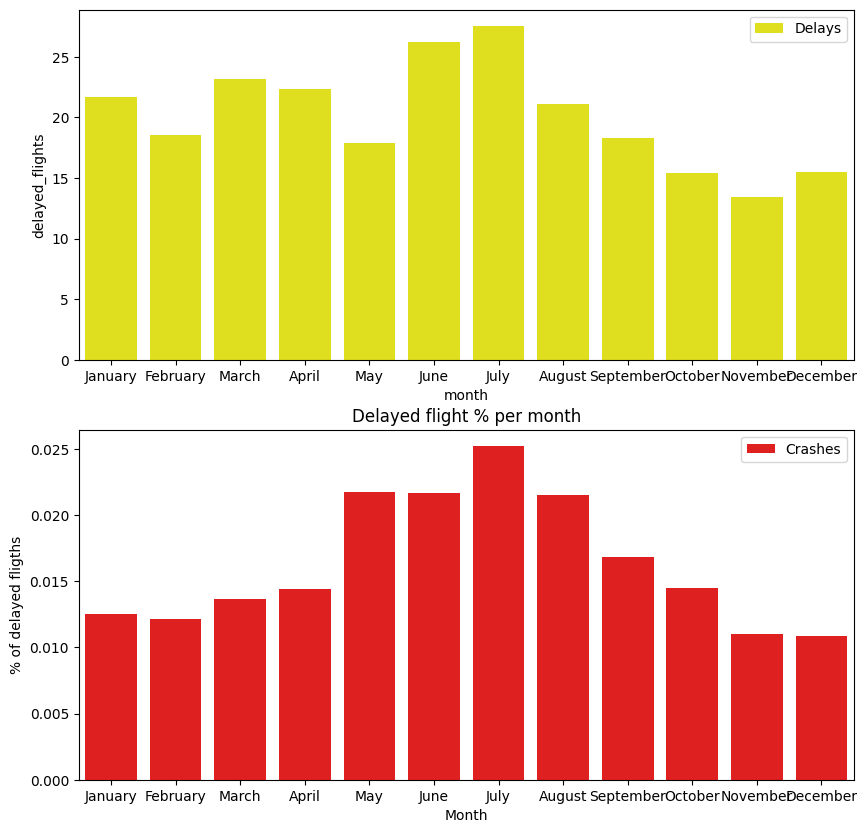

In [289]:
fig, axs =plt.subplots(2,1,figsize=(10,10))
_=sns.barplot(((df.delay.groupby('month')['arr_del15'].sum() / df.delay.groupby('month')['arr_flights'].sum()) * 100).reset_index(name="delayed_flights").sort_values(by='month'), x='month', y='delayed_flights', label='Delays', ax=axs[0], color="Yellow")
_=sns.barplot(((df.crash_data.groupby('Month').size() / df.delay.groupby('month')['arr_flights'].sum()) * 100).reset_index(name='incidents'), x='Month', y='incidents', label='Crashes',ax=axs[1], color='Red')
_=plt.title(f"Delayed flight % per month")
_=plt.xlabel("Month")
_=plt.ylabel("% of delayed fligths")
plt.show()

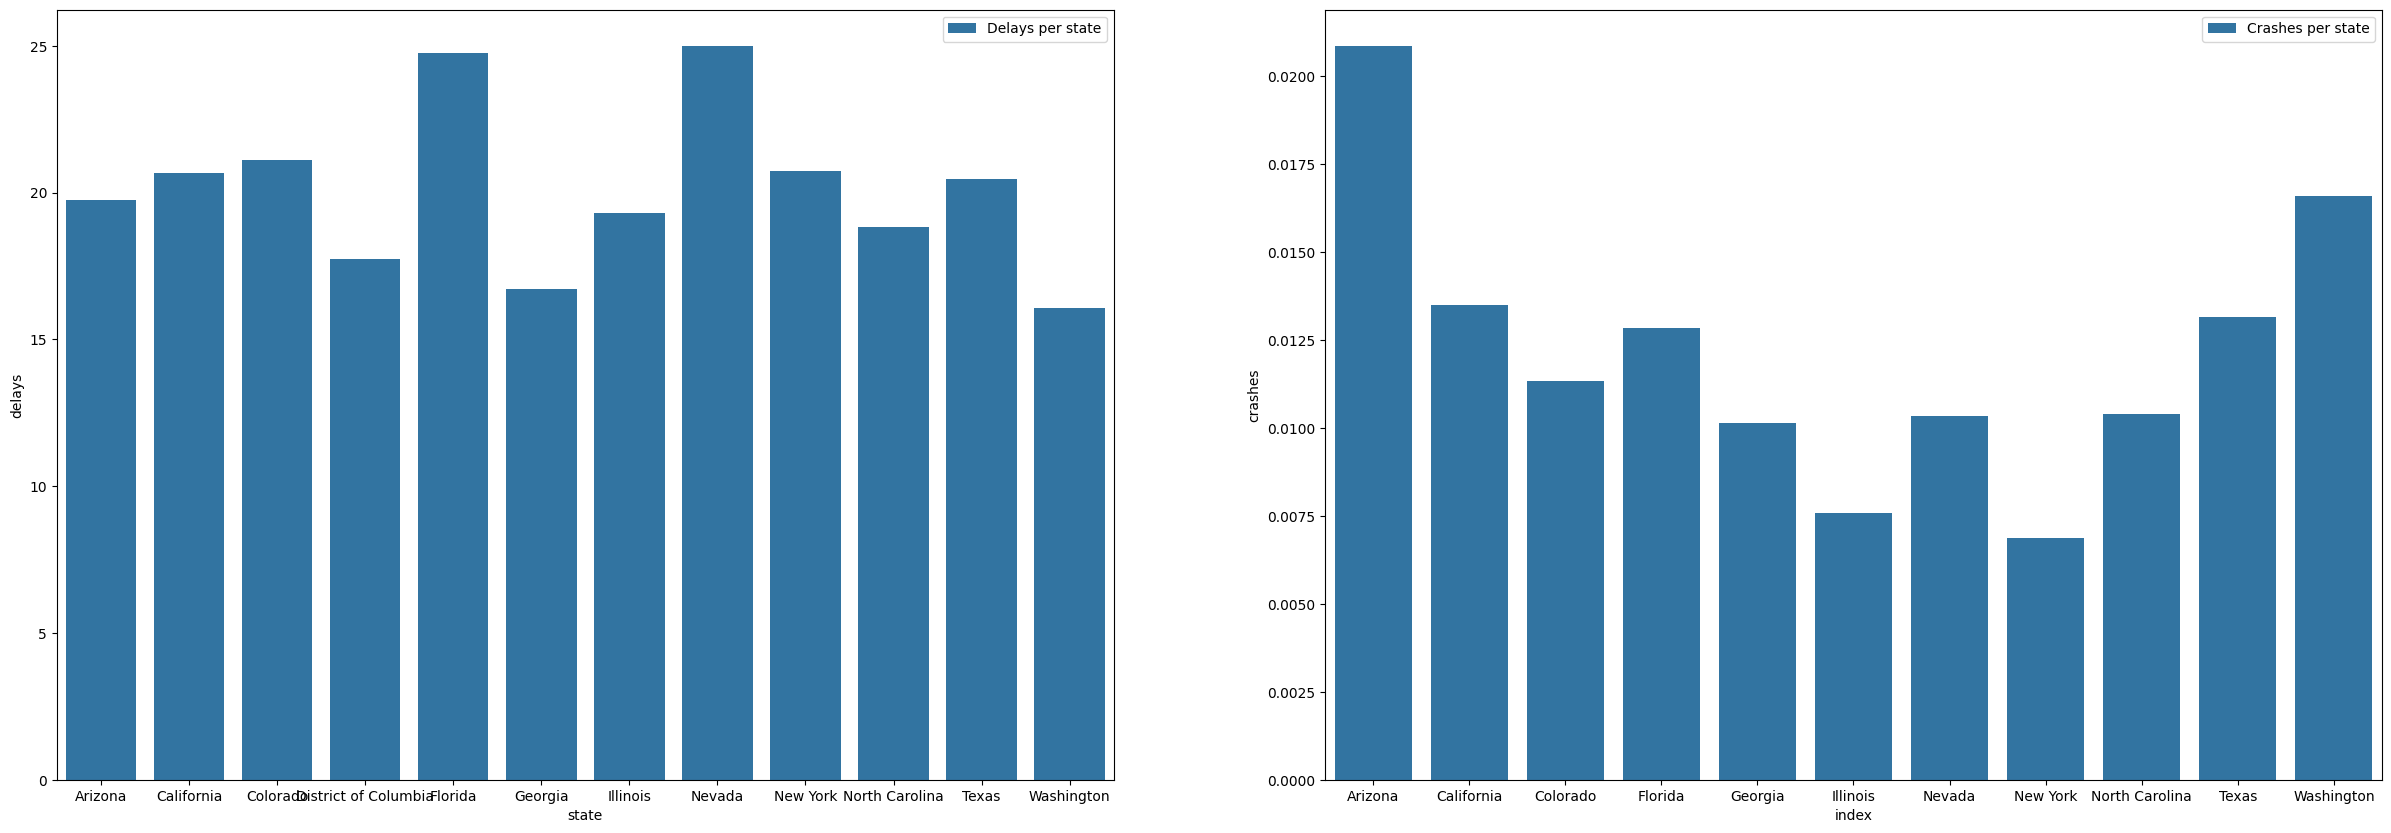

In [304]:
top_states = df.delay.groupby('state')['arr_flights'].sum().reset_index(name="flights").sort_values(by='flights', ascending=False).query('flights >= 200000')['state'].values.tolist()
top_states_df = df.delay.loc[df.delay['state'].isin(top_states)]
crashes_proportion_by_state = ((df.crash_data.groupby('State').size() / df.delay.groupby('state')['arr_flights'].sum()) * 100).dropna().reset_index(name="crashes")
crashes_proportion_by_state = crashes_proportion_by_state.loc[crashes_proportion_by_state['index'].isin(top_states)]
fig, axes = plt.subplots(1,2,figsize=(30,10))
_ = sns.barplot(((top_states_df.groupby('state')['arr_del15'].sum() / top_states_df.groupby('state')['arr_flights'].sum()) * 100).reset_index(name='delays'), x='state', y='delays',ax=axes[0],label='Delays per state')
_ = sns.barplot(crashes_proportion_by_state, x='index', y='crashes',ax=axes[1], label='Crashes per state')
plt.show()

In [ ]:
import plotly.express as px

# Convert boolean values to numeric values for marker size
df.delay['Marker_Size'] = df.delay['Arriving_Flights_Cancelled'].astype(int)

fig = px.scatter(df.delay,
                 x='Arriving_Flights',
                 y='Delayed_Over_15Min',
                 size='Marker_Size',  # Use the new numeric column for marker size
                 color='Carrier_Name',
                 hover_data=['Airport_Name'],
                 title='Airline Performance Dashboard')

fig.update_layout(autosize=False, width=800, height=600)
fig.show()


In [ ]:

monthly_weather_delay = df.delay.groupby('month')['weather_delay'].sum().reset_index()
# Step 2: Prepare df.crash
# Convert 'EventDate' to datetime and filter by 'United States'
df.crash['EventDate'] = pd.to_datetime(df.crash['EventDate'])
df.crash = df.crash[df.crash['Country'] == 'United States']

df.crash['Month'] = df.crash['EventDate'].dt.month
df.crash[['EventDate', 'Month']].head()

#monthly_crash_counts = df.crash.groupby('month').size().reset_index(name='crash_count')
#print(monthly_crash_counts)
# Step 3: Merge the datasets on month
#combined_data = pd.merge(monthly_weather_delay, monthly_crash_counts, on='month', how='inner')



,EventDate,Month
0,2023-12-31 17:40:00+00:00,12
1,2023-12-31 16:13:00+00:00,12
2,2023-12-31 14:13:00+00:00,12
3,2023-12-30 17:00:00+00:00,12
4,2023-12-30 16:04:00+00:00,12


In [ ]:
 Step 4: Linear Regression
X = combined_data[['weather_delay']]  # Independent variable
y = combined_data['crash_count']  # Dependent variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict the crash counts
predictions = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)

print(f"R-squared: {r2}")
print(f"Mean Squared Error: {mse}")
